# neuralthreads
[medium](https://neuralthreads.medium.com/i-was-not-satisfied-by-any-deep-learning-tutorials-online-37c5e9f4bea1)

## Chapter 2 — Optimizers

### 2.2 What is SGD with Momentum?

> First post (own_tutorial_1.ipynb).

> Second post (own_tutorial_2.ipynb).

> Third post (own_tutorial_3.ipynb).

> Previous post (own_tutorial_4.ipynb).

SGD with Momentum is one of the most used optimizers in DL. Both the idea and the implementation are simple. The trick is to use a portion of the previous update and that portion is a scalar called ‘Momentum’.

This post is divided into 3 sections

1. SGD with Momentum in 1 variable
2. SGD with Momentum animation for 1 variable
3. SGD with Momentum in multi-variable function


## #1 SGD with Momentum in 1 variable function

SGD with Momentum is a variant of SGD.

In this method, we use a portion of the previous update.

That portion is a **scalar** called *‘Momentum’* and the value is commonly taken as 0.9

Everything is similar to what we did in SGD except here we have to first initialize update = 0 and while calculating update we add a portion of the previous update, i.e., **momentum * update**

SO, ***SGD with Momentum*** algorithm in very simple language is as follows:

> Step 1 - Set starting point and learning rate

> Step 2 - Initialize update = 0 and momentum = 0.9

> Step 3 - Initiate loop

>       Step 3.1 Calculate update = -learning_rate * gradient + momentum * update

>       Step 3.2 add update to point


First, let us define the function and its derivative and we start from x = -1

In [1]:
%%latex
\begin{gather*}
    y = f(x) = x - x^{3} \\
    \frac{dy}{dx} = f'(x) = 1 - 3x^{2} \\  
\end{gather*}

<IPython.core.display.Latex object>

In [2]:
import numpy as np
np.random.seed(42)

def f(x):                           # function definition
    return x - x**3

def fdash(x):                       # function derivative definition
    return 1 - 3*(x**2)

And now SGD with Momentum

In [3]:
point = -1                                                       # step 1
learning_rate = 0.01

momentum = 0.9                                                   # step 2
update = 0

for i in range(1000):                                            # step 3
    update = - learning_rate * fdash(point) + momentum * update  # step 3.1
    point += update                                              # step 3.2
    
point                                                            # Minima          

-0.5773502691896256

## #2 SGD with Momentum Animation for better understanding

Everything thing is the same as what we did earlier for the animation of SGD. We will create a list to store starting point and updated points in it and will use the iᵗʰ index value for iᵗʰ frame of the animation.

In [4]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from matplotlib.animation import PillowWriter

point_sgd_momentum = [-1]                   # initiating list with
                                            # starting point in it
point = -1                                  # step 1
learning_rate = 0.01

momentum = 0.9                              # step 2
update = 0

for i in range(1000):                       # step 3
    update = momentum * update - learning_rate * fdash(point)
                                            # step 3.1
    point += update                         # step 3.2
    
    point_sgd_momentum.append(point)        # adding updated point
                                            # to the list 
point                                       # Minima

-0.5773502691896256

We will do some settings for our graph for the animation. You can change them if you want something different.

Text(0.5, 1.0, 'SGD with Momentum, learning_rate = 0.01')

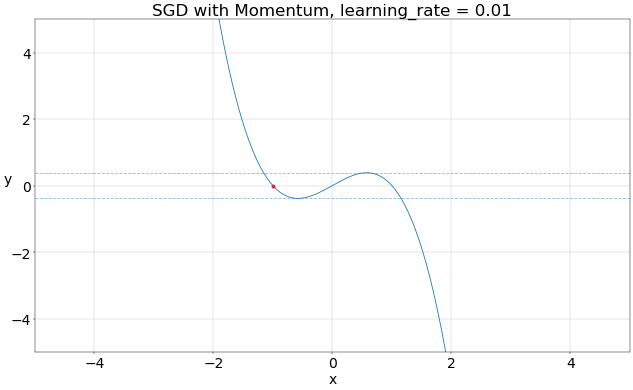

In [5]:
plt.rcParams.update({'font.size':25})

fig = plt.figure(dpi = 40)

fig.set_figheight(10.80)
fig.set_figwidth(19.20)

x_ = np.linspace(-5, 5, 10000)
y_ = f(x_)

ax = plt.axes()
ax.plot(x_, y_)
ax.grid(alpha = 0.7)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y', rotation = 0)

ax.scatter(-1, f(-1), color = 'red')

ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
ax.hlines(f(0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
ax.set_title('SGD with Momentum, learning_rate = 0.01')




Now we will animate the SGD with Momentum optimizer.

In [6]:
def animate(i):
    ax.clear()
    ax.plot(x_, y_)
    ax.grid(alpha = 0.7)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation = 0)
    ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
    ax.set_title('SGD with Momentum, learning_rate = 0.01')

    ax.scatter(point_sgd_momentum[i],f(point_sgd_momentum[i]), color='red')

anim = animation.FuncAnimation(fig, animate, frames = 200, interval = 10)
anim.save('2.2.SGD_with_Momentum_.gif')

We are creating an animation that only has 200 frames and the gif is at 50 fps or frame interval is 20 (10) ms.

It is to be noted that in less than 200 iterations we have reached the minima.

## #3 SGD with Momentum in multi-variable function (2 variables right now)

Everything is the same, we only have to initialize point (1, 0) and update = 0 but with shape (2, 1) and replace fdash(point) with gradient(point).

But first, let us define the function, its partial derivatives and, gradient array

In [7]:
%%latex
\begin{gather*}
    f = 2x^{2} + 2xy + 2y^{2} - 6x \\
        \text{We know that Minima for this function is at (2, -1) \textcolor{red}{¿From where we know this?}} \\
        \text{and we will start from (1, 0)}\\
        \text{The partial derivatives are}\\
        \frac{\partial f}{\partial x} = 4x + 2y - 6 \\
        \frac{\partial f}{\partial y} = 2x + 4y \\
        \\
        \textcolor{orange}{Because (\because) \, of } \\
        ------------------ \\
        \text{Given, } u = y^{x} \\
        \text{We need to find partial derivative} \\
        1. \underline{w.r.t \, x} \, \text{(with respect to ... x)} \\
            \text{In partial derivative if it`s asked to differentiate} \\
            \text{w.r.t one variable (here it is 'x') then all other} \\
            \text{variables{ will be treated as constants.}} \\
            \text{Here it is w.r.t $x$} \, \therefore \, \text{$y$ will be constant} \\
            \\
                \textbf{If: } f(x) = a^{x}; \,\, a = const \\
                \textbf{Then: } {f}\'(x) = a^x \, ln \,a \\
            \\
            \text{Here } u = y^x; y = const. \\
            \therefore \, u' = y^x \, ln \, y \\ \text{(y is const, x is variable)}\\
        \\
        2. \underline{w.r.t \, y} \, \text{(with respect to ... y)} \\
            \text{Here 'x' will be treated as const}
                \\
                \textbf{If: } f(x) = x^{a}; \,\, x = const \\
                \textbf{Then: } {f}\'(x) = ax^{a-1} \\
            \\
            \text{Here } u = y^x \\
            \therefore \, u' = xy^{x-1} \\ \text{(x is const, y is variable)}\\
        ------------------ \\


\end{gather*}

<IPython.core.display.Latex object>

In [8]:
def f(x, y):                                    # function
    return 2*(x**2) + 2*x*y + 2*(y**2) - 6*x    # definition

def fdash_x(x, y):                              # partial derivative
    return 4*x + 2*y - 6                        # w.r.t x

def fdash_y(x, y):                              # partial derivative
    return 2*x + 4*y                            # w.r.t y

def gradient(point):
    return np.array([[     fdash_x(point[0][0], point[1][0])     ],
                     [     fdash_y(point[0][0], point[1][0])     ]], dtype = np.float64)                             # gradients

Now the steps for SGD with Momentum in 2 variables

In [9]:
point = np.array([[   1   ],                       # step 1
                  [   0   ]], dtype = np.float64)
learning_rate = 0.01

momentum = 0.9                                     # step 2
update = np.array([[   0   ],
                   [   0   ]], dtype = np.float64)

for i in range(1000):                              # step 3
    update = - learning_rate * gradient(point) + momentum * update
                                                   # step 3.1
    point += update                                # step 3.2
    
point                                              # Minima

array([[ 2.],
       [-1.]])

### Now as a bonus let us take a look at how SGD with Momentum is better than SGD.

We have a function

In [10]:
%%latex
\begin{gather*}
    y = f(x) = x^4 + 3x^3 + 2x^2 \\
    \text{and this is the graph for the function}
\end{gather*}

<IPython.core.display.Latex object>

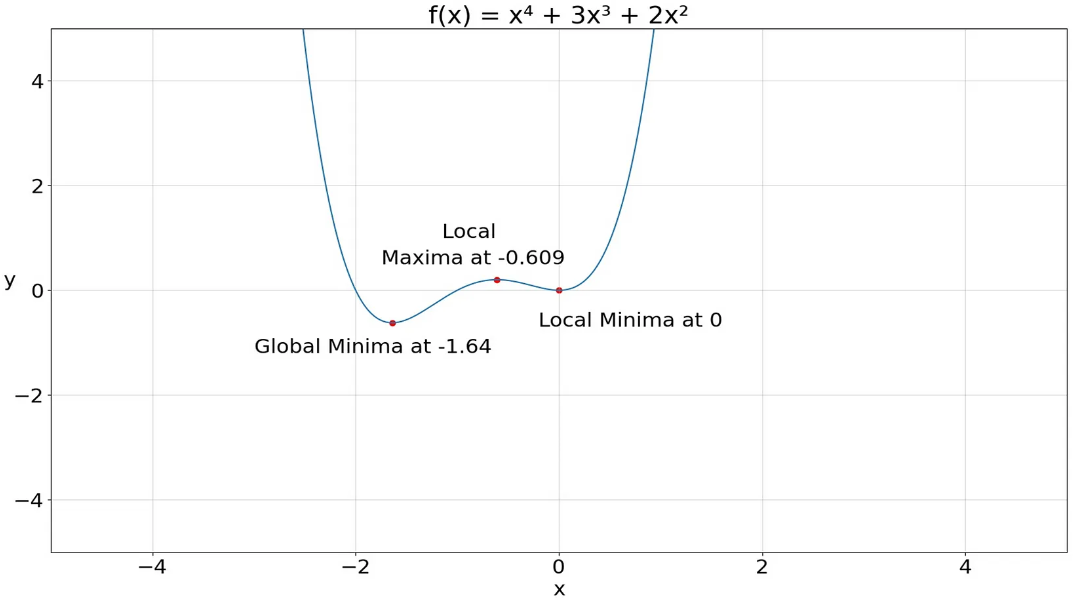

Now if we start at x = 0.75 with learning rate = 0.01 and use SGD optimizer, then we will reach the local minima at x = 0
![simple sgd optimizer](_1_JziMSERahlJAqVGQG2s0NQ.gif "Simple SGD Optimizer")


But if we start from x = 0.75 with learning rate = 0.01 and use SGD with Momentum optimizers with momentum = 0.9, then we will reach the global minima at x = -1.64

![sgd optimizer with momentum](_1_W5tqNg9HN-B5V5wX17b3Gg.gif "SGD Optimizer with Momentum")

You only have to change f(x), fdash(x), and the starting point with few graph settings.

------------------------------------------------

Watch the video on [youtube](https://www.youtube.com/watch?v=ygVi3vBymD8)